In [3]:
# !pip install openpyxl

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [133]:
data =pd.read_excel("heart.xlsx")

In [134]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
df.shape

(303, 14)

In [137]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [139]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["sex"], df["target"])
contingency_table

target,0,1
sex,,
0,24,72
1,114,93


In [140]:
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"chi2: {chi2}")
print(f"p_value: {p_value}")

chi2: 22.717227046576355
p_value: 1.8767776216941503e-06


In [141]:
df["sex"] = df["sex"].astype("object")
df["cp"] = df["cp"].astype("object")
df["fbs"] = df["fbs"].astype("object")
df["restecg"] = df["restecg"].astype("object")
df["exang"] = df["exang"].astype("object")
# df["slope"] = df["slope"].astype("object")
# df["ca"] = df["ca"].astype("object")
df["thal"] = df["thal"].astype("object")
df["target"] = df["target"].astype("object") 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


In [143]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000


In [145]:
df.target.value_counts()/df.shape[0]

target
1    0.544554
0    0.455446
Name: count, dtype: float64

### EDA

In [2]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, explorative=True)
# profile.to_notebook_iframe()

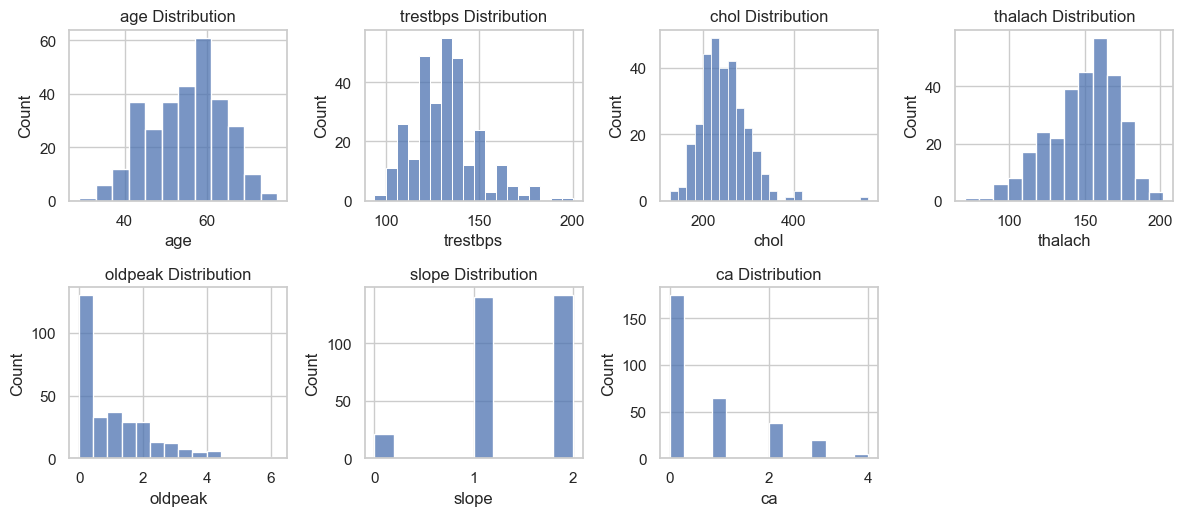

In [78]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(12, 10))
cols = ['age','trestbps','chol','thalach','oldpeak','slope','ca']

for idx, i in enumerate(cols):
    plt.subplot(4, 4, idx+1)
    sns.histplot(x=i, data=df)
    plt.title(f"{i} Distribution")
plt.tight_layout()
plt.show()

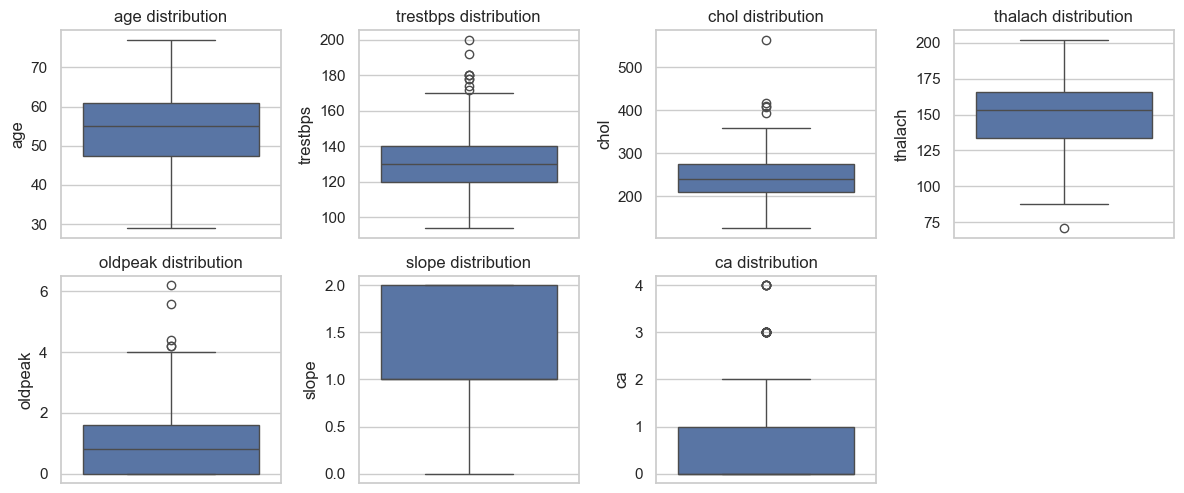

In [79]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 10))

for idx, i in enumerate(cols):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(df[i])
    plt.title(f"{i} distribution")
plt.tight_layout()
plt.show()

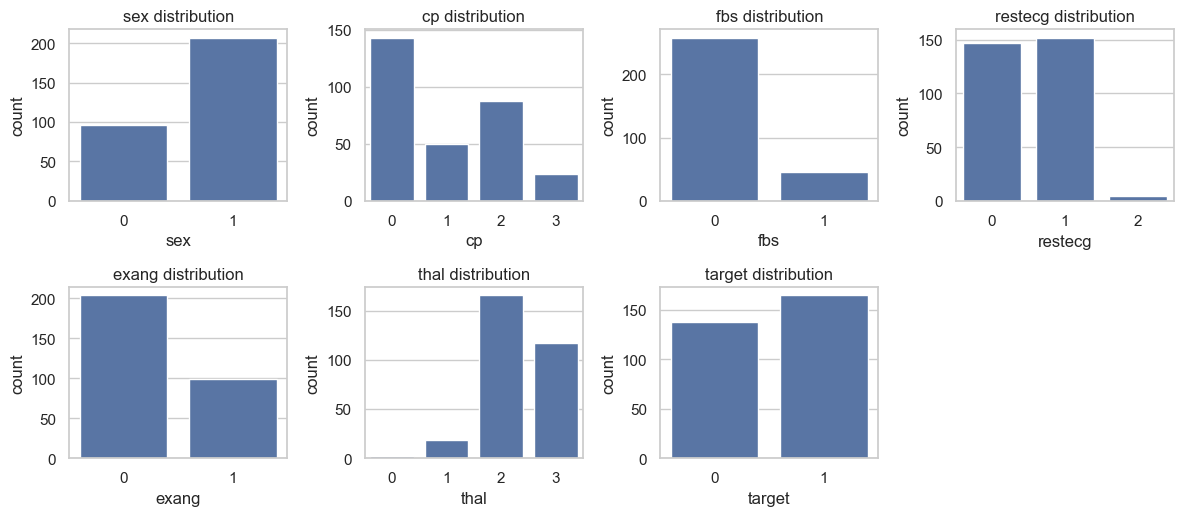

In [151]:
# Set the aesthetic style of the plots
# sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(12, 10))
cols = ['sex','cp','fbs','restecg','exang','thal','target']

for idx, i in enumerate(cols):
    plt.subplot(4, 4, idx+1)
    sns.countplot(x=df[i])
    plt.title(f"{i} distribution")
plt.tight_layout()
plt.show()

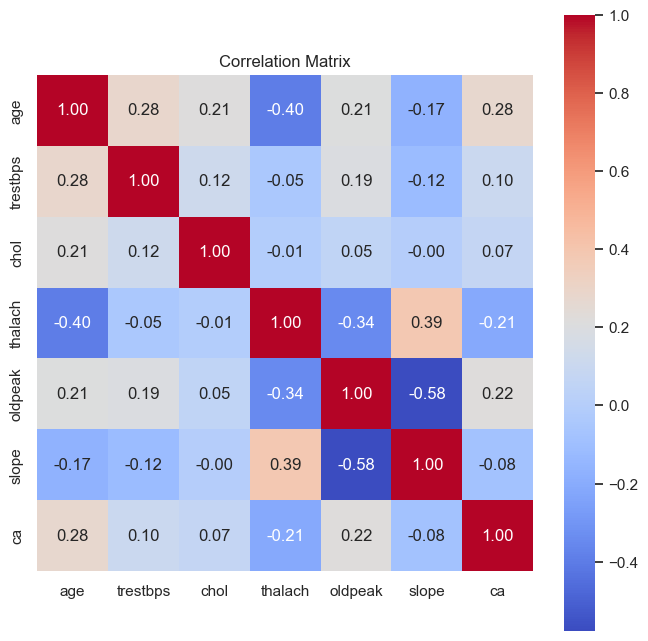

In [154]:
plt.figure(figsize=(8, 8))
cols = ['age','trestbps','chol','thalach','oldpeak','slope','ca']
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Pre Processing

### one hot encoding

In [80]:
df = pd.get_dummies(df, columns = ["cp", "restecg", "thal"], drop_first=True)

In [81]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


### label encoding

In [82]:
encoder = LabelEncoder()
for col in ["sex", "fbs", "exang", "target"]:
    df[col] = encoder.fit_transform(df[col])

In [83]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [84]:
scaler = StandardScaler()
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak","ca","slope"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [85]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,-2.274579,-0.714429,1,False,False,True,False,False,True,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,-2.274579,-0.714429,1,False,True,False,True,False,False,True,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0.976352,-0.714429,1,True,False,False,False,False,False,True,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0.976352,-0.714429,1,True,False,False,True,False,False,True,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0.976352,-0.714429,1,False,False,False,True,False,False,True,False


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    int32  
 2   trestbps   303 non-null    float64
 3   chol       303 non-null    float64
 4   fbs        303 non-null    int32  
 5   thalach    303 non-null    float64
 6   exang      303 non-null    int32  
 7   oldpeak    303 non-null    float64
 8   slope      303 non-null    float64
 9   ca         303 non-null    float64
 10  target     303 non-null    int32  
 11  cp_1       303 non-null    bool   
 12  cp_2       303 non-null    bool   
 13  cp_3       303 non-null    bool   
 14  restecg_1  303 non-null    bool   
 15  restecg_2  303 non-null    bool   
 16  thal_1     303 non-null    bool   
 17  thal_2     303 non-null    bool   
 18  thal_3     303 non-null    bool   
dtypes: bool(8), float64(7), int32(4)
memory usage: 23.

In [87]:
df['cp_1'] = df['cp_1'].astype('int64')
df['cp_2'] = df['cp_2'].astype('int64')
df['cp_3'] = df['cp_3'].astype('int64')
df['restecg_1'] = df['restecg_1'].astype('int64')
df['restecg_2'] = df['restecg_2'].astype('int64')
df['thal_1'] = df['thal_1'].astype('int64')
df['thal_2'] = df['thal_2'].astype('int64')
df['thal_3'] = df['thal_3'].astype('int64')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    int32  
 2   trestbps   303 non-null    float64
 3   chol       303 non-null    float64
 4   fbs        303 non-null    int32  
 5   thalach    303 non-null    float64
 6   exang      303 non-null    int32  
 7   oldpeak    303 non-null    float64
 8   slope      303 non-null    float64
 9   ca         303 non-null    float64
 10  target     303 non-null    int32  
 11  cp_1       303 non-null    int64  
 12  cp_2       303 non-null    int64  
 13  cp_3       303 non-null    int64  
 14  restecg_1  303 non-null    int64  
 15  restecg_2  303 non-null    int64  
 16  thal_1     303 non-null    int64  
 17  thal_2     303 non-null    int64  
 18  thal_3     303 non-null    int64  
dtypes: float64(7), int32(4), int64(8)
memory usage: 40

In [89]:
X = df.drop(columns = ["target"])
y = df["target"]

In [90]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,-2.274579,-0.714429,0,0,1,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,-2.274579,-0.714429,0,1,0,1,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0.976352,-0.714429,1,0,0,0,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0.976352,-0.714429,1,0,0,1,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0.976352,-0.714429,0,0,0,1,0,0,1,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Feature Selection

In [92]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Perform RFECV to determine the best number of features
rfecv = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_
selected_features_new = X_train.columns[rfecv.support_]

print(f"Optimal number of features: {optimal_num_features}")
print("Selected features:", selected_features_new)

Optimal number of features: 15
Selected features: Index(['sex', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'cp_1',
       'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


In [93]:
LR = LogisticRegression()

# Define Hyperparameter Grid
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [1, 10, 15, 20],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 150, 200]
}

# Perform Grid Search
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train[selected_features_new],y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test[selected_features_new])

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



### Model Development

In [94]:
log_reg.fit(X_train[selected_features_new], y_train)

LogisticRegression(max_iter=10000)

In [95]:
# feature coefficients (β1, β2, ..., βn)
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

for feature, coef in zip(selected_features_new, coefficients):
    print(f"{feature}: {coef:.4f}")

# the intercept (β0)
print(f"Intercept: {intercept:.4f}")

sex: -0.6937
fbs: 0.4852
thalach: 0.2854
exang: -1.0679
oldpeak: -0.4207
slope: 0.4939
ca: -1.0733
cp_1: 0.3070
cp_2: 1.4489
cp_3: 0.9871
restecg_1: 0.6959
restecg_2: -0.1898
thal_1: 0.3693
thal_2: 0.6148
thal_3: -1.0899
Intercept: -0.0757


In [96]:
# Get 
intercept = log_reg.intercept_[0]

# Get feature coefficients (β1, β2, ..., βn)
coefficients = log_reg.coef_[0]

# Display results
print("Intercept (β0):", intercept)
for feature, coef in zip(selected_features_new, coefficients):
    print(f"{feature}: {coef:.4f}")

Intercept (β0): -0.07566133116814722
sex: -0.6937
fbs: 0.4852
thalach: 0.2854
exang: -1.0679
oldpeak: -0.4207
slope: 0.4939
ca: -1.0733
cp_1: 0.3070
cp_2: 1.4489
cp_3: 0.9871
restecg_1: 0.6959
restecg_2: -0.1898
thal_1: 0.3693
thal_2: 0.6148
thal_3: -1.0899


In [97]:
# Compute odds ratios
odds_ratios = np.exp(coefficients)

# Display odds ratios
print("\nOdds Ratios:")
for feature, odds_ratio in zip(selected_features_new, odds_ratios):
    print(f"{feature}: {odds_ratio:.4f}")


Odds Ratios:
sex: 0.4997
fbs: 1.6244
thalach: 1.3303
exang: 0.3437
oldpeak: 0.6566
slope: 1.6387
ca: 0.3419
cp_1: 1.3593
cp_2: 4.2585
cp_3: 2.6835
restecg_1: 2.0056
restecg_2: 0.8271
thal_1: 1.4468
thal_2: 1.8493
thal_3: 0.3362


In [98]:
y_pred = log_reg.predict(X_test[selected_features_new])
y_prob = log_reg.predict_proba(X_test[selected_features_new])[:, 1]

In [99]:
y_prob

array([0.08444802, 0.49886809, 0.82701186, 0.01480651, 0.94283655,
       0.96577097, 0.58030799, 0.00411206, 0.01657903, 0.52787903,
       0.72185346, 0.08063704, 0.93589664, 0.03645643, 0.96915026,
       0.96441071, 0.96901805, 0.08653729, 0.01062681, 0.04459824,
       0.45026059, 0.02700725, 0.50507508, 0.74549423, 0.9120724 ,
       0.70145581, 0.89578277, 0.70213977, 0.01227838, 0.90738762,
       0.04356513, 0.03965234, 0.00819666, 0.18118707, 0.7014827 ,
       0.06734347, 0.8739233 , 0.9101583 , 0.55673541, 0.87135133,
       0.41409253, 0.83002538, 0.89505286, 0.83494197, 0.74294828,
       0.00261722, 0.47094744, 0.96734417, 0.06724097, 0.02921623,
       0.05146747, 0.0050131 , 0.7696078 , 0.9673331 , 0.11213758,
       0.00134923, 0.02896905, 0.97775667, 0.03560049, 0.00487891,
       0.09538604, 0.93269086, 0.1116852 , 0.81369882, 0.78637047,
       0.06905462, 0.7739677 , 0.72212828, 0.77549884, 0.97635817,
       0.91262145, 0.92563667, 0.63107951, 0.87274399, 0.06753

### Model Evaluation

In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.42%


In [101]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[33  8]
 [ 8 42]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



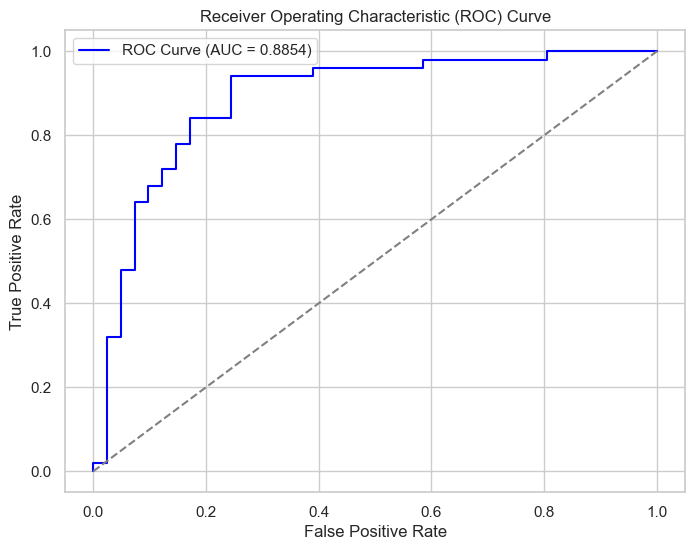

AUC Score: 0.8854


In [103]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

### Tracking and Deployment

In [104]:
report_dict = classification_report(y_test, y_pred, output_dict = True)

In [105]:
report_dict

{'0': {'precision': 0.8048780487804879,
  'recall': 0.8048780487804879,
  'f1-score': 0.8048780487804879,
  'support': 41.0},
 '1': {'precision': 0.84, 'recall': 0.84, 'f1-score': 0.84, 'support': 50.0},
 'accuracy': 0.8241758241758241,
 'macro avg': {'precision': 0.822439024390244,
  'recall': 0.822439024390244,
  'f1-score': 0.822439024390244,
  'support': 91.0},
 'weighted avg': {'precision': 0.8241758241758241,
  'recall': 0.8241758241758241,
  'f1-score': 0.8241758241758241,
  'support': 91.0}}

In [1]:
import mlflow
import mlflow.sklearn

In [60]:
mlflow.set_experiment('Heart')
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run():
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metrics({
        "accuracy":report_dict['accuracy'], 
        "recall_class_0":report_dict['0']['recall'],
        "recall_class_1":report_dict['1']['recall'],
        "f1_score_macro":report_dict['macro avg']['f1-score']
    })
    
    mlflow.sklearn.log_model(best_lr, "Logistic Regression Model")

2025/02/16 05:25:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run vaunted-slug-477 at: http://127.0.0.1:5000/#/experiments/877351092580571558/runs/f88c1a03531b41ca804107380653e019
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/877351092580571558


In [61]:
model_name = "Logistic Regression Model"
run_id = "f88c1a03531b41ca804107380653e019"
model_uri = f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id = run_id):
    mlflow.register_model(model_uri=model_uri, name = model_name)

Successfully registered model 'Logistic Regression Model'.
2025/02/16 05:26:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression Model, version 1


🏃 View run vaunted-slug-477 at: http://127.0.0.1:5000/#/experiments/877351092580571558/runs/f88c1a03531b41ca804107380653e019
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/877351092580571558


Created version '1' of model 'Logistic Regression Model'.


In [62]:
current_model_uri = f"models:/{model_name}@dev"
production_model_name = 'heart-disease-prediction-production'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'heart-disease-prediction-production'.
Copied version '1' of model 'Logistic Regression Model' to version '1' of model 'heart-disease-prediction-production'.


<ModelVersion: aliases=[], creation_timestamp=1739663918780, current_stage='None', description='', last_updated_timestamp=1739663918780, name='heart-disease-prediction-production', run_id='f88c1a03531b41ca804107380653e019', run_link='', source='models:/Logistic Regression Model/1', status='READY', status_message=None, tags={}, user_id='', version='1'>